In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from wordcloud import WordCloud, STOPWORDS

from nltk.tokenize import word_tokenize, sent_tokenize, wordpunct_tokenize, TreebankWordTokenizer, TweetTokenizer, MWETokenizer
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

from os import path
sns.set()
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, average_precision_score

import calendar
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import time



**Importing CSV files**

In [2]:
train_df=pd.read_csv("C:/Users/VATSALA NEMA/Documents/SEM 7/NLP 2022/Project- Sarcasm detection in Soc med/Dataset/project1/project_training_data_with_class_labels.csv" , error_bad_lines=False) 
#test_df = pd.read_csv("C:/Users/VATSALA NEMA/Documents/SEM 7/NLP 2022/Project- Sarcasm detection in Soc med/Dataset/project1/project_test_data.csv", error_bad_lines=False)

C:\Users\VATSALA NEMA\AppData\Local\Temp\ipykernel_4028\3219277780.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train_df=pd.read_csv("C:/Users/VATSALA NEMA/Documents/SEM 7/NLP 2022/Project- Sarcasm detection in Soc med/Dataset/project1/project_training_data_with_class_labels.csv" , error_bad_lines=False)


In [3]:
train_df.head()

,ID,Comments,Parent Comments,Class Labels,Unnamed: 4
0,ocxtitan,Central Illinois,Jesus; where do you live?,non-sarcastic,NaN
1,LeChuckly,To think - CNN used to be the acronym synonymo...,Even The CNN Staff Is Sick Of The Wall-To-Wall...,non-sarcastic,NaN
2,throwitskrub8,But then again; you have to consider that all ...,agree to that part.It can also mean that gujra...,non-sarcastic,NaN
3,fresherthanyouuu,ughhhhh,If a guy told you he doesn't use social media ...,non-sarcastic,NaN
4,_kushagra,I should've put the,No; it's just a programming bug. After all; th...,sarcastic,NaN


In [4]:
train_df.drop(train_df.columns[[4]], axis=1, inplace=True)
train_df.head()

,ID,Comments,Parent Comments,Class Labels
0,ocxtitan,Central Illinois,Jesus; where do you live?,non-sarcastic
1,LeChuckly,To think - CNN used to be the acronym synonymo...,Even The CNN Staff Is Sick Of The Wall-To-Wall...,non-sarcastic
2,throwitskrub8,But then again; you have to consider that all ...,agree to that part.It can also mean that gujra...,non-sarcastic
3,fresherthanyouuu,ughhhhh,If a guy told you he doesn't use social media ...,non-sarcastic
4,_kushagra,I should've put the,No; it's just a programming bug. After all; th...,sarcastic


In [5]:
train_df.rename(columns = {' Class Labels ':'label'}, inplace = True)

train_df['label'].replace(['non-sarcastic','sarcastic'],[1,0], inplace = True)

In [6]:
df1 = train_df[train_df.isna().any(axis=1)]

df1.head()

train_df.dropna(subset=['Comments'], inplace=False)

#df5=train_df.dropna(inplace=True)

#df2 = test_df[test_df.isna().any(axis=1)]

#df2

#test_df=test_df.dropna()


,ID,Comments,Parent Comments,label
0,ocxtitan,Central Illinois,Jesus; where do you live?,1
1,LeChuckly,To think - CNN used to be the acronym synonymo...,Even The CNN Staff Is Sick Of The Wall-To-Wall...,1
2,throwitskrub8,But then again; you have to consider that all ...,agree to that part.It can also mean that gujra...,1
3,fresherthanyouuu,ughhhhh,If a guy told you he doesn't use social media ...,1
4,_kushagra,I should've put the,No; it's just a programming bug. After all; th...,0
...,...,...,...,...
808098,Arectarius,50% hp/def elgif; impiety orb; bourn jewel che...,Hate to break it to you; but Gloomy can't do a...,0
808099,dale1v,Rubicon Mango.,Hey Reddit; if you could only drink one flavor...,1
808100,Semyonov,Essentially GAP insurance right?,I'm sure you can pay for it. Most insurance pl...,1
808101,futalover99,Yeah; but sometimes that weird kid keeps tryin...,Ive been subscribed to that for a while; and a...,1


In [7]:
train_df.info()

#test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808103 entries, 0 to 808102
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               808101 non-null  object
 1   Comments         808062 non-null  object
 2   Parent Comments  808099 non-null  object
 3   label            808080 non-null  object
dtypes: object(4)
memory usage: 24.7+ MB


In [8]:
train_df

,ID,Comments,Parent Comments,label
0,ocxtitan,Central Illinois,Jesus; where do you live?,1
1,LeChuckly,To think - CNN used to be the acronym synonymo...,Even The CNN Staff Is Sick Of The Wall-To-Wall...,1
2,throwitskrub8,But then again; you have to consider that all ...,agree to that part.It can also mean that gujra...,1
3,fresherthanyouuu,ughhhhh,If a guy told you he doesn't use social media ...,1
4,_kushagra,I should've put the,No; it's just a programming bug. After all; th...,0
...,...,...,...,...
808098,Arectarius,50% hp/def elgif; impiety orb; bourn jewel che...,Hate to break it to you; but Gloomy can't do a...,0
808099,dale1v,Rubicon Mango.,Hey Reddit; if you could only drink one flavor...,1
808100,Semyonov,Essentially GAP insurance right?,I'm sure you can pay for it. Most insurance pl...,1
808101,futalover99,Yeah; but sometimes that weird kid keeps tryin...,Ive been subscribed to that for a while; and a...,1


In [9]:
corpus = train_df['Comments'].values
#.astype('U')

**Exploratory Data Analysis**

In [10]:
# to check number of sarcastic and non-sarcastic comments
train_df['label'].value_counts()

#Almost equal number of sarcastic and non-sarcastic comments => Dataset Balanced.

print(train_df['label'].value_counts()/len(train_df))


"""Sarcastic comments are normally distributed in length. Non-sarcastic comments has a right-skew.

# Most common words in the sarcastic comments 
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(12, 12))
wordcloud.generate(str(train_df.loc[train_df['label'] == 1, 'Parent Comments']))
plt.grid(b= False)
plt.imshow(wordcloud);"""



0                                                                                                                                                                                                                                                                                                                                                                                                                                         0.500001
1                                                                                                                                                                                                                                                                                                                                                                                                                                         0.499959
Chaining help So i was dexnav chaining for a ralts on r102 and then i got the thing "cannot be found in the area or whatever" so t

"Sarcastic comments are normally distributed in length. Non-sarcastic comments has a right-skew.\n\n# Most common words in the sarcastic comments \nwordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,\n                max_words = 200, max_font_size = 100, \n                random_state = 17, width=800, height=400)\n\nplt.figure(figsize=(12, 12))\nwordcloud.generate(str(train_df.loc[train_df['label'] == 1, 'Parent Comments']))\nplt.grid(b= False)\nplt.imshow(wordcloud);"

In [11]:
# prepare the cross-validation procedure
#cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
#scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [12]:
"""plt.figure(figsize=(20,10))
ax = sns.countplot(x='label',  data= train_df)
ax.set(title = "Distribution of Classes", xlabel="Sarcasm Status", ylabel = "Total Count")
total = float(len(train_df))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/to
            tal)*100),
            ha="center") 
    
plt.show()

"""

'plt.figure(figsize=(20,10))\nax = sns.countplot(x=\'label\',  data= train_df)\nax.set(title = "Distribution of Classes", xlabel="Sarcasm Status", ylabel = "Total Count")\ntotal = float(len(train_df))\n\nfor p in ax.patches:\n    height = p.get_height()\n    ax.text(p.get_x()+p.get_width()/2.,\n            height + 3,\n            \'{:1.1f}%\'.format((height/to\n            tal)*100),\n            ha="center") \n    \nplt.show()\n\n'

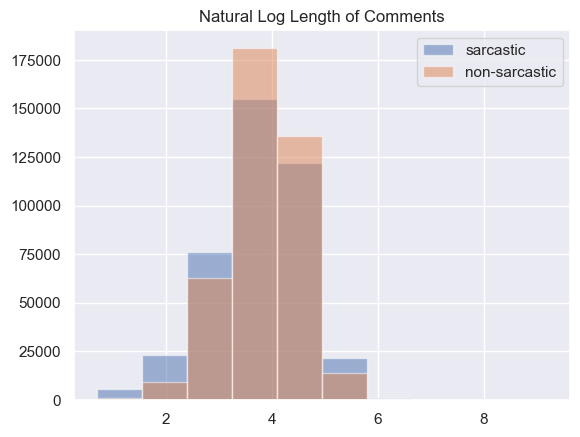

In [13]:
# To check if there is any relation between the length of the comment and its label

train_df.loc[train_df['label']==1,'Comments'].str.len().apply(np.log1p).hist(label='sarcastic', alpha=.5)
train_df.loc[train_df['label']==0,'Comments'].str.len().apply(np.log1p).hist(label='non-sarcastic', alpha=.5)
plt.legend()
plt.title('Natural Log Length of Comments')
plt.show()

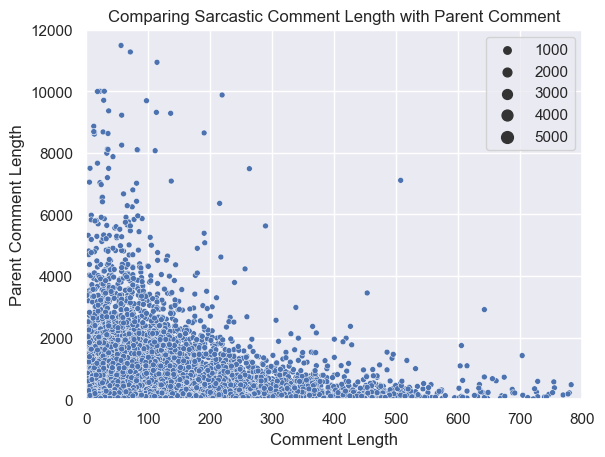

In [14]:
# Comparing sarcastic comments with Parent comments
sarcasm_comm_len = np.array(train_df.loc[train_df['label'] == 1]['Comments'].str.len())
parent_comm_len = np.array(train_df.loc[train_df['label'] == 1]['Parent Comments'].str.len())
ratio_len = np.array((train_df.loc[train_df['label'] == 1]['Comments'].str.len())/(train_df.loc[train_df['label'] == 1]['Parent Comments'].str.len()))

d = pd.DataFrame({'Comment Length': sarcasm_comm_len, 'Parent Comment Length': parent_comm_len, 'Ratio Length': ratio_len}, columns=['Comment Length', 'Parent Comment Length', 'Ratio Length'])

ax = plt.axes()
sns.scatterplot(data=d, x="Comment Length", y="Parent Comment Length",  size=ratio_len)
ax.set_title("Comparing Sarcastic Comment Length with Parent Comment")

# control x and y limits
plt.ylim(0, 12000)
plt.xlim(0, 800)
plt.show()



**Data Pre-Processing**

In [15]:
# 
# Removing the null comments
train_df.dropna(subset=['Comments'], inplace=True)
train_df['Comments'] = train_df['Comments'].str.lower()
train_df['Comments'] = train_df['Comments'].str.replace('[^\w\s]','', regex=True)

corpus = train_df['Comments'].astype(str)

corpus

0                                          central illinois
1         to think  cnn used to be the acronym synonymou...
2         but then again you have to consider that all h...
3                                                   ughhhhh
4                                        i shouldve put the
                                ...                        
808098    50 hpdef elgif impiety orb bourn jewel checkin...
808099                                        rubicon mango
808100                      essentially gap insurance right
808101    yeah but sometimes that weird kid keeps trying...
808102    petroleum doesnt really require a terroir like...
Name: Comments, Length: 808062, dtype: object

**Feature Engineering**

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

method="Binary"

if method=="Tfidf":
    vectorizer= TfidfVectorizer(stop_words='english', ngram_range=(1,1))
elif method=="Binary":
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=2, lowercase='false')
#elif method=="Bigram":
    #vectorizer = CountVectorizer(ngram_range=(1, 2),token_pattern=r'\b\w+\b', min_df=1).build_analyzer()

X = vectorizer.fit_transform(corpus)
np.shape(X)


(808062, 385796)

In [36]:
labels=train_df['label'].to_list()

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(X)


In [40]:
#print(vectorizer.get_feature_names())
#X=np.asmatrix(X)
x_train_df=pd.DataFrame(x_train_tfidf)
x_train_df.shape

X_new=Countvecs.astype('U')

In [41]:
X_new.info()
X_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808062 entries, 0 to 808061
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       808062 non-null  object
dtypes: object(1)
memory usage: 6.2+ MB


,0
0,"(0, 49197)\t1\n (0, 155205)\t1\n (0, 49213..."
1,"(0, 331388)\t1\n (0, 56875)\t1\n (0, 35187..."
2,"(0, 62503)\t1\n (0, 152814)\t1\n (0, 31873..."
3,"(0, 347096)\t1"
4,"(0, 297069)\t1"


In [42]:
x_train, x_test, y_train, y_test = train_test_split(X_new, labels, test_size= 0.25, random_state=42)

In [47]:
parameters = {'solver': [ 'lbfgs', 'liblinear', 'saga'], 'verbose': [0, 1, 2]}

# multinomial logistic regression a.k.a softmax classifier
logit = LogisticRegression(random_state= 42)

logit_classifier = GridSearchCV(logit, parameters, cv = 10, n_jobs= 4)

# sklearn's pipeline
Binary_logit_pipeline = Pipeline([('vectorizer', vectorizer),  ('logit_classifier', logit_classifier)])

In [48]:
#clf = SVC(kernel='linear').fit(train_x, train_y)

NameError: name 'SVC' is not defined

In [49]:
tfidf_logit_pipeline.fit(x_train, y_train)


AttributeError: 'int' object has no attribute 'lower'

In [ ]:
print(logit_classifier.best_params_)
print(logit_classifier.best_score_)

In [ ]:
valid_pred = tfidf_logit_pipeline.predict(x_test)

In [ ]:
#accuracy_score(y_test, valid_pred)

In [ ]:
# Getting the accuracy metric
acc = accuracy_score(y_test, valid_pred)
pre = precision_score(y_test, valid_pred)
rec = recall_score(y_test,valid_pred)
f1 = f1_score(y_test, valid_pred)
mp=average_precision_score(y_test, valid_pred, average='micro')

print ('Model Performance: ')
print ('Micro)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)

cm = confusion_matrix(y_test,valid_pred)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

In [ ]:
cm =  pd.DataFrame(cm, index=['Natural','Sarcastic'],columns=['Natural','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Ground Truth',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)